In [2]:
# STAGE 3 --- Training and Running the DNN --- 

In [8]:
from sklearn.model_selection import train_test_split
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

In [10]:
# Set random seeds for reproducibility
import tensorflow as tf
import numpy as np
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [11]:
data_cleaned = pd.read_csv('data_cleaned.csv')

In [12]:
data_cleaned

,loan_amnt,int_rate,installment,annual_inc,loan_status,dti,open_acc,pub_rec,revol_bal,revol_util,...,zip_code_11650,zip_code_22690,zip_code_29597,zip_code_30723,zip_code_48052,zip_code_70466,zip_code_86630,zip_code_93700,purpose,earliest_cr_line (days)
0,10000.0,11.44,329.48,117000.0,1,26.24,16.0,0.0,36369.0,41.8,...,0,1,0,0,0,0,0,0,0.810401,12471
1,8000.0,11.99,265.68,65000.0,1,22.05,17.0,0.0,20131.0,53.3,...,0,0,0,0,0,0,0,0,0.792573,7327
2,15600.0,10.49,506.97,43057.0,1,12.79,13.0,0.0,11987.0,92.2,...,0,0,0,0,0,0,0,0,0.832809,6201
3,7200.0,6.49,220.65,54000.0,1,2.60,6.0,0.0,5472.0,21.5,...,0,0,0,0,0,0,0,0,0.832809,6535
4,24375.0,17.27,609.33,55000.0,0,33.95,13.0,0.0,24584.0,69.8,...,1,0,0,0,0,0,0,0,0.832809,9276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395214,10000.0,10.99,217.38,40000.0,1,15.63,6.0,0.0,1990.0,34.3,...,0,0,0,1,0,0,0,0,0.792573,7204
395215,21000.0,12.29,700.42,110000.0,1,21.45,6.0,0.0,43263.0,95.7,...,0,0,0,0,0,0,0,0,0.792573,6747
395216,5000.0,9.99,161.32,56500.0,1,17.56,15.0,0.0,32704.0,66.9,...,0,0,0,0,0,1,0,0,0.792573,10006
395217,21000.0,15.31,503.02,64000.0,1,15.88,9.0,0.0,15704.0,53.8,...,0,0,1,0,0,0,0,0,0.792573,12318


In [13]:
X = data_cleaned.drop('loan_status', axis = 1)
y = data_cleaned['loan_status']

In [14]:
# Test train split
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size = 0.2, )

In [15]:
scaler = MinMaxScaler()

In [16]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
data_cleaned.shape

(395219, 69)

In [18]:
# Define model
model = Sequential()

In [19]:
# First we go with two hiddens layers, one of 136 neurons and one of 68.

In [20]:
# Ensure input layer is equal to number of columns
model.add(Dense(136, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(68, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [21]:
# Activiation of the last output layer is sigmoid as this is a binary classification

In [22]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam')

In [23]:
# Incorporate early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=25, restore_best_weights=True)

In [24]:
# Train the model 
model.fit(X_train, y_train, epochs=50, batch_size=128, validation_split=0.2, callbacks=[early_stopping], validation_data=(X_test,y_test))

Epoch 1/50
495/495 [==============================] - 3s 5ms/step - loss: 0.3548 - val_loss: 0.2709
Epoch 2/50
495/495 [==============================] - 2s 4ms/step - loss: 0.2795 - val_loss: 0.2640
Epoch 3/50
495/495 [==============================] - 2s 4ms/step - loss: 0.2712 - val_loss: 0.2632
Epoch 4/50
495/495 [==============================] - 2s 4ms/step - loss: 0.2690 - val_loss: 0.2611
Epoch 5/50
495/495 [==============================] - 2s 5ms/step - loss: 0.2655 - val_loss: 0.2605
Epoch 6/50
495/495 [==============================] - 2s 5ms/step - loss: 0.2644 - val_loss: 0.2598
Epoch 7/50
495/495 [==============================] - 2s 4ms/step - loss: 0.2635 - val_loss: 0.2606
Epoch 8/50
495/495 [==============================] - 2s 4ms/step - loss: 0.2625 - val_loss: 0.2599
Epoch 9/50
495/495 [==============================] - 2s 4ms/step - loss: 0.2619 - val_loss: 0.2602
Epoch 10/50
495/495 [==============================] - 2s 4ms/step - loss: 0.2610 - val_loss: 0.2600

In [25]:
losses = pd.DataFrame(model.history.history)

In [26]:
losses

,loss,val_loss
0,0.354802,0.270899
1,0.279533,0.264021
2,0.271242,0.263163
3,0.269001,0.261088
4,0.265497,0.260547
5,0.264371,0.259795
6,0.263464,0.260592
7,0.262548,0.259855
8,0.261904,0.260205
9,0.261007,0.260014


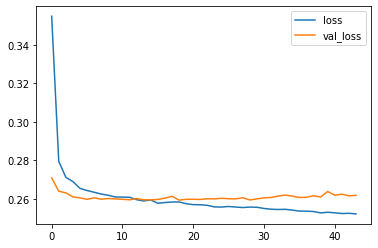

In [27]:
losses.plot()

In [28]:
# Get predictions to begin evaluation
predictions = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [29]:
# Evaluation
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.43      0.60     62102
           1       0.88      1.00      0.93    254073

    accuracy                           0.89    316175
   macro avg       0.94      0.72      0.77    316175
weighted avg       0.90      0.89      0.87    316175



In [30]:
#  -- Analysis of Performance --

# This model performs fairly well overall.
# Precision for defaulted loans is almost perfect - of all predictions of default, 99% of the time it is defaulted.
# However it only identifys 43% so its only precise off the relatively small number it identifies, i.e. its overly conservative in guessing positive.
# Precision is not quite as good for repayed loans - 0.88 however 100% of repayed are identified, naturally precision will be lower.
# However, there is a bias for estimating repayment as 0.88 precision means there are more false positives.  
# Accurarcy seems high at 89%, (of all predictions 89% are correct), however the target variable balance is 80:20.
# Meaning if our model had 0 predictive power and selected 'repayed' every time regardless, its accuarcy would be as high as 80%.
# So the excess 9% is whats significant in this case.

In [31]:
# Stage 4 --- Rebalancing Target Variable and retraining the model --- 

# Resample: sort the issue of the imbalance in the target variable, improving its ability to learn on the default instances 
# - oversample 0, undersample 1

In [32]:
# 1. Resample to address imbalance
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)
# model to now be retrained using these samples 

In [33]:
# 2. Redefine new model with the same structure but with X_res as input_dim

In [34]:
model_2 = Sequential()

In [35]:
# NN structuree
model_2.add(Dense(138, input_dim=X_res.shape[1], activation='relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(69, activation='relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(1, activation='sigmoid'))

In [36]:
# Compile Model
model_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [37]:
# 3. Fit and run model using resampled/balanced data
model_2.fit(X_res, y_res, epochs=50, batch_size=128, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/50
796/796 [==============================] - 4s 4ms/step - loss: 0.4124 - accuracy: 0.7837 - val_loss: 0.5051 - val_accuracy: 0.6241
Epoch 2/50
796/796 [==============================] - 3s 4ms/step - loss: 0.3508 - accuracy: 0.8121 - val_loss: 0.4937 - val_accuracy: 0.6375
Epoch 3/50
796/796 [==============================] - 4s 5ms/step - loss: 0.3455 - accuracy: 0.8141 - val_loss: 0.4718 - val_accuracy: 0.6786
Epoch 4/50
796/796 [==============================] - 3s 4ms/step - loss: 0.3412 - accuracy: 0.8176 - val_loss: 0.5005 - val_accuracy: 0.6515
Epoch 5/50
796/796 [==============================] - 3s 4ms/step - loss: 0.3397 - accuracy: 0.8194 - val_loss: 0.4637 - val_accuracy: 0.6917
Epoch 6/50
796/796 [==============================] - 4s 4ms/step - loss: 0.3383 - accuracy: 0.8211 - val_loss: 0.5068 - val_accuracy: 0.6421
Epoch 7/50
796/796 [==============================] - 3s 4ms/step - loss: 0.3365 - accuracy: 0.8214 - val_loss: 0.4343 - val_accuracy: 0.7310
Epoch 

In [38]:
losses_2 = pd.DataFrame(model_2.history.history)

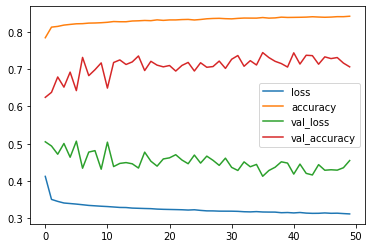

In [39]:
losses_2.plot()

In [40]:
#  -- Analysis --
# - Val_accuarcy and val loss fluctating a lot but do have slight upward and downard trend respectively
# - loss and accuarcy barely moving in the first few epochs and then slowly converging 

In [41]:
# Get predictions to begin evaluation
predictions_2 = model_2.predict_classes(X_test)

In [42]:
# Classification report
print(classification_report(y_test,predictions_2))

              precision    recall  f1-score   support

           0       0.68      0.60      0.64     62102
           1       0.90      0.93      0.92    254073

    accuracy                           0.87    316175
   macro avg       0.79      0.76      0.78    316175
weighted avg       0.86      0.87      0.86    316175



In [92]:
#  -- Evaluation -- 
# There are some interesting changes to the model, but overall it has not really improved
# This can be seen straight away by the fact that f1-score has increased 4 points for defaulted loans but decreased 1 for repayed ones
# Moreover accuracy has decreased 2% to 87%
# This model also sees a very big drop in precision for defaulted loans, going down to 0.68, for a very small increase in precisions for repayed.
# Recall for defaulted loans has increased quite significantly which is expected as it has more defaulted data points to train on. 
# However there is still a loss in recall for repayed loans going from 1.00 to 0.93

# Conclusion: It would be better to not re-sample the data and stick to the first model, perhaps the imbalance somewhat reflects the nature of loan repayment.

In [11]:
# Save all training and test data in the form of CSVs to be used in the next notebook - 'Hyperparameter Tuning'

In [43]:
X_train_df = pd.DataFrame(X_train)

In [44]:
y_train_series = pd.Series(y_train)

In [45]:
X_test_df = pd.DataFrame(X_test)
y_test_series = pd.Series(y_test)

In [46]:
X_train_df.to_csv('X_train.csv', index=False)
y_train_series.to_csv('y_train.csv', index = False)
X_test_df.to_csv('X_test.csv', index=False)
y_test_series.to_csv('y_test.csv', index = False)